# Notebook - showing how to detect JIPs w/ 66 joint scheme
This is the notebook for the minimal features model (DAS66) to identify JIPs. Here you need the full individual joint information (SJC66 & TJC68)

## 1. Feature engineering

### 1.1 import example data

In [1]:
import pandas as pd

# Get Original clustering metadata (same samples as development set)
# Not in the github data (due to .gitignore)
# you can find the original Leiden EHR data here: 
metadata = pd.read_csv('../data/MMAE_clustering_270.csv', index_col=0)

### 1.2 Calculate joint region features based on DAS44 joint scheme

#### Define joint regions

In [2]:
import numpy as np


l_num = ['BSE', 'Age']  # 'Hb', 'Leuko', 'Trom', 'ESR'
l_cat = ['RF', 'aCCP', 'Sex']

# MTP + ankle? 
L_Foot_Swelling_66 = [
    'Zwelling_onderste spronggewricht links_positive',
    'Zwelling_onderste spronggewricht rechts_positive',
    'Zwelling_bovenste spronggewicht links_positive',
    'Zwelling_bovenste spronggewricht rechts_positive',
    'Zwelling_mtp 2 links_positive',
    'Zwelling_mtp 2 rechts_positive',
    'Zwelling_mtp 3 links_positive',
    'Zwelling_mtp 3 rechts_positive',
    'Zwelling_mtp 4 links_positive',
    'Zwelling_mtp 4 rechts_positive',
    'Zwelling_mtp 5 links_positive',
    'Zwelling_mtp 5 rechts_positive',
    
    ## pip in feet part of DAS66
    'Zwelling_pip 2 links voet_positive',
    'Zwelling_pip 2 rechts voet_positive',
    'Zwelling_pip 3 links voet_positive',
    'Zwelling_pip 3 rechts voet_positive',
    'Zwelling_pip 4 links voet_positive',
    'Zwelling_pip 4 rechts voet_positive',
    'Zwelling_pip 5 links voet_positive',
    'Zwelling_pip 5 rechts voet_positive',
    
    ## mtp 1 in feet part of DAS66
    'Zwelling_mtp 1 links_positive',
    'Zwelling_mtp 1 rechts_positive',
    ## 
]

L_Foot_Tender_66 = ['Pijn_mtp 1 links_positive',
 'Pijn_mtp 1 rechts_positive',
 'Pijn_mtp 2 links_positive',
 'Pijn_mtp 2 rechts_positive',
 'Pijn_mtp 3 links_positive',
 'Pijn_mtp 3 rechts_positive',
 'Pijn_mtp 4 links_positive',
 'Pijn_mtp 4 rechts_positive',
 'Pijn_mtp 5 links_positive',
 'Pijn_mtp 5 rechts_positive',
 'Pijn_onderste spronggewricht rechts_positive', 'Pijn_bovenste spronggewicht links_positive', 'Pijn_bovenste spronggewricht rechts_positive',
  # also PIP  in feet (part of DAS66)
 'Pijn_pip 2 links voet_positive',
 'Pijn_pip 2 rechts voet_positive',
 'Pijn_pip 3 links voet_positive',
 'Pijn_pip 3 rechts voet_positive',
 'Pijn_pip 4 links voet_positive',
 'Pijn_pip 4 rechts voet_positive',
 'Pijn_pip 5 links voet_positive',
 'Pijn_pip 5 rechts voet_positive',
 
 # also MTP 1
 'Pijn_mtp 1 links_positive',
 'Pijn_mtp 1 rechts_positive',
           ]


L_Hand_Tender_66 = [
    'Pijn_pip 2 links hand_positive', 'Pijn_pip 2 rechts hand_positive',
    'Pijn_pip 3 links hand_positive', 'Pijn_pip 3 rechts hand_positive',
    'Pijn_pip 4 links hand_positive', 'Pijn_pip 4 rechts hand_positive',
    'Pijn_pip 5 links hand_positive', 'Pijn_pip 5 rechts hand_positive',
    'Pijn_mcp 1 links_positive', 'Pijn_mcp 1 rechts_positive',
    'Pijn_mcp 2 links_positive', 'Pijn_mcp 2 rechts_positive',
    'Pijn_mcp 3 links_positive', 'Pijn_mcp 3 rechts_positive',
    'Pijn_mcp 4 links_positive', 'Pijn_mcp 4 rechts_positive',
    'Pijn_mcp 5 links_positive', 'Pijn_mcp 5 rechts_positive',
    'Pijn_IP links_positive', 'Pijn_IP rechts_positive',
    'Pijn_dip 2 links_positive',
     'Pijn_dip 2 rechts_positive',
     'Pijn_dip 3 links_positive',
     'Pijn_dip 3 rechts_positive',
     'Pijn_dip 4 links_positive',
     'Pijn_dip 4 rechts_positive',
     'Pijn_dip 5 links_positive',
     'Pijn_dip 5 rechts_positive',
]

L_Hand_Swelling_66 = [
    'Zwelling_pols L_positive', 'Zwelling_pols R_positive',
    'Zwelling_pip 2 links hand_positive', 'Zwelling_pip 2 rechts hand_positive',
    'Zwelling_pip 3 links hand_positive', 'Zwelling_pip 3 rechts hand_positive',
    'Zwelling_pip 4 links hand_positive', 'Zwelling_pip 4 rechts hand_positive',
    'Zwelling_pip 5 links hand_positive', 'Zwelling_pip 5 rechts hand_positive',
    'Zwelling_mcp 1 links_positive', 'Zwelling_mcp 1 rechts_positive',
    'Zwelling_mcp 2 links_positive', 'Zwelling_mcp 2 rechts_positive',
    'Zwelling_mcp 3 links_positive', 'Zwelling_mcp 3 rechts_positive',
    'Zwelling_mcp 4 links_positive', 'Zwelling_mcp 4 rechts_positive',
    'Zwelling_mcp 5 links_positive', 'Zwelling_mcp 5 rechts_positive',
    'Zwelling_IP links_positive', 'Zwelling_IP rechts_positive',
    'Zwelling_dip 2 links_positive',
     'Zwelling_dip 2 rechts_positive',
     'Zwelling_dip 3 links_positive',
     'Zwelling_dip 3 rechts_positive',
     'Zwelling_dip 4 links_positive',
     'Zwelling_dip 4 rechts_positive',
     'Zwelling_dip 5 links_positive',
     'Zwelling_dip 5 rechts_positive',
     
]

l_DAS28_positive = [
    'Pijn_pols L_positive', 'Pijn_pols R_positive',
    'Pijn_pip 2 links hand_positive', 'Pijn_pip 2 rechts hand_positive',
    'Pijn_pip 3 links hand_positive', 'Pijn_pip 3 rechts hand_positive',
    'Pijn_pip 4 links hand_positive', 'Pijn_pip 4 rechts hand_positive',
    'Pijn_pip 5 links hand_positive', 'Pijn_pip 5 rechts hand_positive',
    'Pijn_mcp 1 links_positive', 'Pijn_mcp 1 rechts_positive',
    'Pijn_mcp 2 links_positive', 'Pijn_mcp 2 rechts_positive',
    'Pijn_mcp 3 links_positive', 'Pijn_mcp 3 rechts_positive',
    'Pijn_mcp 4 links_positive', 'Pijn_mcp 4 rechts_positive',
    'Pijn_mcp 5 links_positive', 'Pijn_mcp 5 rechts_positive',
    'Pijn_IP links_positive', 'Pijn_IP rechts_positive',
    'Pijn_schouder L_positive', 'Pijn_schouder R_positive',
    'Pijn_Elleboog L_positive', 'Pijn_elleboog R_positive',
    'Pijn_knie links_positive', 'Pijn_knie rechts_positive',

    'Zwelling_pols L_positive', 'Zwelling_pols R_positive',
    'Zwelling_pip 2 links hand_positive', 'Zwelling_pip 2 rechts hand_positive',
    'Zwelling_pip 3 links hand_positive', 'Zwelling_pip 3 rechts hand_positive',
    'Zwelling_pip 4 links hand_positive', 'Zwelling_pip 4 rechts hand_positive',
    'Zwelling_pip 5 links hand_positive', 'Zwelling_pip 5 rechts hand_positive',
    'Zwelling_mcp 1 links_positive', 'Zwelling_mcp 1 rechts_positive',
    'Zwelling_mcp 2 links_positive', 'Zwelling_mcp 2 rechts_positive',
    'Zwelling_mcp 3 links_positive', 'Zwelling_mcp 3 rechts_positive',
    'Zwelling_mcp 4 links_positive', 'Zwelling_mcp 4 rechts_positive',
    'Zwelling_mcp 5 links_positive', 'Zwelling_mcp 5 rechts_positive',
    'Zwelling_knie links_positive', 'Zwelling_knie rechts_positive',
    'Zwelling_schouder L_positive', 'Zwelling_schouder R_positive',
    'Zwelling_Elleboog L_positive', 'Zwelling_elleboog R_positive',
    'Zwelling_IP links_positive', 'Zwelling_IP rechts_positive'
]
l_DAS44_positive = l_DAS28_positive + [
    'Zwelling_sternoclaviculair L_positive', 'Zwelling_sternoclaviculair R_positive',
    'Pijn_sternoclaviculair L_positive', 'Pijn_sternoclaviculair R_positive',
    'Zwelling_acromioclaviaculair L_positive', 'Zwelling_acromioclaviaculair R_positive',
    'Pijn_acromioclaviaculair L_positive', 'Pijn_acromioclaviaculair R_positive',
    'Pijn_onderste spronggewricht links_positive', 'Pijn_onderste spronggewricht rechts_positive',
    'Pijn_bovenste spronggewicht links_positive', 'Pijn_bovenste spronggewricht rechts_positive',
    'Zwelling_onderste spronggewricht links_positive', 'Zwelling_onderste spronggewricht rechts_positive',
    'Zwelling_bovenste spronggewicht links_positive', 'Zwelling_bovenste spronggewricht rechts_positive',
    'Pijn_mtp 2 links_positive', 'Pijn_mtp 2 rechts_positive',
    'Pijn_mtp 3 links_positive', 'Pijn_mtp 3 rechts_positive',
    'Pijn_mtp 4 links_positive', 'Pijn_mtp 4 rechts_positive',
    'Pijn_mtp 5 links_positive', 'Pijn_mtp 5 rechts_positive',
    'Zwelling_mtp 2 links_positive', 'Zwelling_mtp 2 rechts_positive',
    'Zwelling_mtp 3 links_positive', 'Zwelling_mtp 3 rechts_positive',
    'Zwelling_mtp 4 links_positive', 'Zwelling_mtp 4 rechts_positive',
    'Zwelling_mtp 5 links_positive', 'Zwelling_mtp 5 rechts_positive'
]

l_DAS66_positive = l_DAS44_positive + [
    'Pijn_dip 2 links_positive',
     'Pijn_dip 2 rechts_positive',
     'Pijn_dip 3 links_positive',
     'Pijn_dip 3 rechts_positive',
     'Pijn_dip 4 links_positive',
     'Pijn_dip 4 rechts_positive',
     'Pijn_dip 5 links_positive',
     'Pijn_dip 5 rechts_positive',
     'Pijn_mtp 1 links_positive',
     'Pijn_mtp 1 rechts_positive',
     'Pijn_tarsometatarsaal L_positive',
     'Pijn_tarsometatarsaal R_positive',
     'Pijn_temporomandibulair L_positive',
     'Pijn_temporomandibulair R_positive',
    
    'Pijn_pip 2 links voet_positive',
     'Pijn_pip 2 rechts voet_positive',
     'Pijn_pip 3 links voet_positive',
     'Pijn_pip 3 rechts voet_positive',
     'Pijn_pip 4 links voet_positive',
     'Pijn_pip 4 rechts voet_positive',
     'Pijn_pip 5 links voet_positive',
     'Pijn_pip 5 rechts voet_positive',
    
    # For HIP Only tender -> that is why TJC = 68; and SJC = 66
    'Pijn_heup links_positive',
    'Pijn_heup rechts_positive',
    
     'Zwelling_dip 2 links_positive',
     'Zwelling_dip 2 rechts_positive',
     'Zwelling_dip 3 links_positive',
     'Zwelling_dip 3 rechts_positive',
     'Zwelling_dip 4 links_positive',
     'Zwelling_dip 4 rechts_positive',
     'Zwelling_dip 5 links_positive',
     'Zwelling_dip 5 rechts_positive',
     'Zwelling_mtp 1 links_positive',
     'Zwelling_mtp 1 rechts_positive',
     'Zwelling_tarsometatarsaal L_positive',
     'Zwelling_tarsometatarsaal R_positive',
     'Zwelling_temporomandibulair L_positive',
     'Zwelling_temporomandibulair R_positive',
    
    'Zwelling_pip 2 rechts voet_positive',
    'Zwelling_pip 3 links voet_positive',
    'Zwelling_pip 3 rechts voet_positive',
    'Zwelling_pip 4 links voet_positive',
    'Zwelling_pip 4 rechts voet_positive',
    'Zwelling_pip 5 links voet_positive',
    'Zwelling_pip 5 rechts voet_positive',

]

L_Big_Joints_66 = [
    'Pijn_schouder L_positive', 
    'Pijn_schouder R_positive', 
    'Pijn_Elleboog L_positive',
    'Pijn_elleboog R_positive', 
    'Pijn_heup links_positive', 
    'Pijn_heup rechts_positive', 
    'Pijn_knie links_positive', 
    'Pijn_knie rechts_positive',
    'Zwelling_schouder L_positive', 
    'Zwelling_schouder R_positive', 
    'Zwelling_Elleboog L_positive', 
    'Zwelling_elleboog R_positive',
    'Zwelling_heup links_positive', 
    'Zwelling_heup rechts_positive',
    'Zwelling_knie links_positive', 
    'Zwelling_knie rechts_positive',
    'Pijn_onderste spronggewricht links_positive', 
    'Pijn_onderste spronggewricht rechts_positive', 
    'Pijn_bovenste spronggewicht links_positive', 
    'Pijn_bovenste spronggewricht rechts_positive',
    'Zwelling_onderste spronggewricht links_positive', 
    'Zwelling_onderste spronggewricht rechts_positive', 
    'Zwelling_bovenste spronggewicht links_positive', 
    'Zwelling_bovenste spronggewricht rechts_positive',
    'Zwelling_cervical spine_positive', 
    'Pijn_cervical spine_positive', 
    'Pijn_sacro-ileacaal gewricht links_positive', 
    'Pijn_sacro-ileacaal gewricht rechts_positive'
]# Sacro-ileacaal has no 'Zwelling' version

L_Small_Joints_66 = ['Pijn_mtp 1 links_positive',
 'Pijn_mtp 1 rechts_positive',
 'Pijn_mtp 2 links_positive',
 'Pijn_mtp 2 rechts_positive',
 'Pijn_mtp 3 links_positive',
 'Pijn_mtp 3 rechts_positive',
 'Pijn_mtp 4 links_positive',
 'Pijn_mtp 4 rechts_positive',
 'Pijn_mtp 5 links_positive',
 'Pijn_mtp 5 rechts_positive',
 'Pijn_pip 2 links voet_positive',
 'Pijn_pip 2 rechts voet_positive',
 'Pijn_pip 3 links voet_positive',
 'Pijn_pip 3 rechts voet_positive',
 'Pijn_pip 4 links voet_positive',
 'Pijn_pip 4 rechts voet_positive',
 'Pijn_pip 5 links voet_positive',
 'Pijn_pip 5 rechts voet_positive',
    'Pijn_pip 2 links hand_positive', 'Pijn_pip 2 rechts hand_positive',
    'Pijn_pip 3 links hand_positive', 'Pijn_pip 3 rechts hand_positive',
    'Pijn_pip 4 links hand_positive', 'Pijn_pip 4 rechts hand_positive',
    'Pijn_pip 5 links hand_positive', 'Pijn_pip 5 rechts hand_positive',
    'Pijn_mcp 1 links_positive', 'Pijn_mcp 1 rechts_positive',
    'Pijn_mcp 2 links_positive', 'Pijn_mcp 2 rechts_positive',
    'Pijn_mcp 3 links_positive', 'Pijn_mcp 3 rechts_positive',
    'Pijn_mcp 4 links_positive', 'Pijn_mcp 4 rechts_positive',
    'Pijn_mcp 5 links_positive', 'Pijn_mcp 5 rechts_positive',
    'Pijn_IP links_positive', 'Pijn_IP rechts_positive',
    'Zwelling_pols L_positive', 'Zwelling_pols R_positive',
    'Zwelling_pip 2 links hand_positive', 'Zwelling_pip 2 rechts hand_positive',
    'Zwelling_pip 3 links hand_positive', 'Zwelling_pip 3 rechts hand_positive',
    'Zwelling_pip 4 links hand_positive', 'Zwelling_pip 4 rechts hand_positive',
    'Zwelling_pip 5 links hand_positive', 'Zwelling_pip 5 rechts hand_positive',
    'Zwelling_mcp 1 links_positive', 'Zwelling_mcp 1 rechts_positive',
    'Zwelling_mcp 2 links_positive', 'Zwelling_mcp 2 rechts_positive',
    'Zwelling_mcp 3 links_positive', 'Zwelling_mcp 3 rechts_positive',
    'Zwelling_mcp 4 links_positive', 'Zwelling_mcp 4 rechts_positive',
    'Zwelling_mcp 5 links_positive', 'Zwelling_mcp 5 rechts_positive',
    'Zwelling_IP links_positive', 'Zwelling_IP rechts_positive',
    'Zwelling_mtp 2 links_positive',
    'Zwelling_mtp 2 rechts_positive',
    'Zwelling_mtp 3 links_positive',
    'Zwelling_mtp 3 rechts_positive',
    'Zwelling_mtp 4 links_positive',
    'Zwelling_mtp 4 rechts_positive',
    'Zwelling_mtp 5 links_positive',
    'Zwelling_mtp 5 rechts_positive',
    'Zwelling_sternoclaviculair L_positive', 'Zwelling_sternoclaviculair R_positive',
    'Pijn_sternoclaviculair L_positive', 'Pijn_sternoclaviculair R_positive',
    'Zwelling_acromioclaviaculair L_positive', 'Zwelling_acromioclaviaculair R_positive',
    'Pijn_acromioclaviaculair L_positive', 'Pijn_acromioclaviaculair R_positive',
    'Pijn_dip 2 links_positive',
     'Pijn_dip 2 rechts_positive',
     'Pijn_dip 3 links_positive',
     'Pijn_dip 3 rechts_positive',
     'Pijn_dip 4 links_positive',
     'Pijn_dip 4 rechts_positive',
     'Pijn_dip 5 links_positive',
     'Pijn_dip 5 rechts_positive',
     'Pijn_mtp 1 links_positive',
     'Pijn_mtp 1 rechts_positive',
     'Zwelling_dip 2 links_positive',
     'Zwelling_dip 2 rechts_positive',
     'Zwelling_dip 3 links_positive',
     'Zwelling_dip 3 rechts_positive',
     'Zwelling_dip 4 links_positive',
     'Zwelling_dip 4 rechts_positive',
     'Zwelling_dip 5 links_positive',
     'Zwelling_dip 5 rechts_positive',
     'Zwelling_mtp 1 links_positive',
     'Zwelling_mtp 1 rechts_positive',
     'Zwelling_pip 2 links voet_positive',
    'Zwelling_pip 2 rechts voet_positive',
    'Zwelling_pip 3 links voet_positive',
    'Zwelling_pip 3 rechts voet_positive',
    'Zwelling_pip 4 links voet_positive',
    'Zwelling_pip 4 rechts voet_positive',
    'Zwelling_pip 5 links voet_positive',
    'Zwelling_pip 5 rechts voet_positive',
                    ]

#### Create new features

In [3]:
l_TJC_66 = [i for i in l_DAS66_positive if 'Pijn_' in i] 
l_SJC_66 = [i for i in l_DAS66_positive if 'Zwelling_' in i] 
l_TJC_44 = [i for i in l_DAS44_positive if 'Pijn_' in i] 
l_SJC_44 = [i for i in l_DAS44_positive if 'Zwelling_' in i] 
l_TJC_28 = [i for i in l_DAS28_positive if 'Pijn_' in i] 
l_SJC_28 = [i for i in l_DAS28_positive if 'Zwelling_' in i] 


metadata['SJC_FOOT'] = metadata[L_Foot_Swelling_66].sum(axis=1)
metadata['SJC_HAND'] = metadata[L_Hand_Swelling_66].sum(axis=1)
metadata['TJC_FOOT'] = metadata[L_Foot_Tender_66].sum(axis=1)
metadata['TJC_HAND'] = metadata[L_Hand_Tender_66].sum(axis=1)

metadata['JC_FOOT'] = metadata['SJC_FOOT'] + metadata['TJC_FOOT']
metadata['JC_HAND'] = metadata['SJC_HAND'] + metadata['TJC_HAND']

metadata['SJC66'] = metadata[l_SJC_66].sum(axis=1)
metadata['TJC66'] = metadata[l_TJC_66].sum(axis=1)
metadata['SJC44'] = metadata[l_SJC_44].sum(axis=1)
metadata['TJC44'] = metadata[l_TJC_44].sum(axis=1)
metadata['SJC28'] = metadata[l_SJC_28].sum(axis=1)
metadata['TJC28'] = metadata[l_TJC_28].sum(axis=1)


# Total count Small / Big
metadata['Small66'] = metadata[L_Small_Joints_66].sum(axis=1)
metadata['Big66'] = metadata[L_Big_Joints_66].sum(axis=1)

# Fraction big versus small
metadata['bigFrac'] = metadata['Big66'] / (metadata['Small66'] + metadata['Big66'] + 1e-3)


# introduce 4 orthogonal features
metadata['handFrac'] = metadata['JC_HAND'] / (metadata['JC_HAND'] + metadata['JC_FOOT'] + 1e-3)
metadata['handFrac_S'] = metadata['SJC_HAND'] / (metadata['SJC_HAND'] + metadata['SJC_FOOT'] + 1e-3)
metadata['handFrac_T'] = metadata['TJC_HAND'] / (metadata['TJC_HAND'] + metadata['TJC_FOOT'] + 1e-3)

metadata['ratioST'] = metadata['SJC66'] / (metadata['SJC66'] + metadata['TJC66'] + 1e-3)

### 1.3 Add predictions from Ensemble model for JIP-foot prediction (KAN encoder)

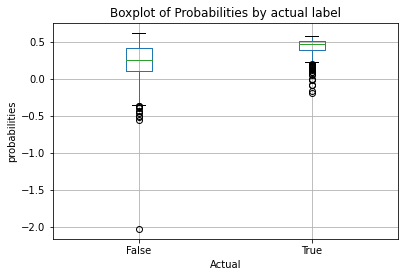

In [4]:
import sys
sys.path.append(r'../models/das66')
from kan_encoders66 import kan_encoder_foot
import matplotlib.pyplot as plt

metadata["pred_foot"] = metadata.apply(kan_encoder_foot, axis=1)
metadata['Foot_cluster'] = metadata['PhenoGraph_clusters']==0

# Box plot
metadata.boxplot(column='pred_foot', by='Foot_cluster')
plt.xlabel('Actual')
plt.ylabel('probabilities')
plt.title('Boxplot of Probabilities by actual label')
plt.suptitle('')  # This removes the automatic title
plt.show()

### 1.4 Define target & features

In [8]:
l_cols = ['SJC_FOOT',  'SJC_HAND',  'TJC_FOOT', 'TJC_HAND',  'SJC66',  'TJC66', 'Small66', 'Big66',
 'Age', 'RF', 'aCCP', 'Sex', 'handFrac', 'bigFrac', 'BSE', 'SJC28', 'TJC28', 'SJC44', 'TJC44', 'ratioST', 'pred_foot', 'Hb', 'Trom', 'Leuko'] 
l_cols.extend(l_DAS66_positive)

TARGET = 'PhenoGraph_clusters'

# Define X & y
X = pd.DataFrame(metadata[l_cols].fillna(0)).reset_index(drop=True) 
y_ = metadata[TARGET] 

## 2. Deploy Model

### 2.1 Load pickle model

In [15]:
import xgboost as xgb
import pickle
from sklearn.model_selection import train_test_split

# Load model 
with open("../models/das66/JIP_xgb_pred_66.pk", 'rb') as fin:
    bst = pickle.load(fin) # 
    
    
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=12345)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Use the model
y_pred = bst.predict(dtest)


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig = plt.figure()

# 1️⃣ Compute confusion matrix

# Convert to predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_labels)
labels = np.unique(y_test)

# 2️⃣ Using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (Multiclass)')
plt.show()

# Accuracy
accuracy = np.trace(cm) / np.sum(cm)
print("Accuracy:", accuracy)

In [31]:
np.array(y_pred)[:, 0]

array([8.5645038e-01, 1.8433332e-03, 9.3291402e-01, ..., 1.2209097e-02,
       5.3845895e-05, 6.2826800e-01], dtype=float32)

## 3. Training model for JIP prediction (example script) 

### 3.1 optuna hyperparameter tuning

## Train XGB

In [ ]:
import xgboost as xgb
import optuna
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, precision_recall_curve, auc, precision_recall_fscore_support
import time
from sklearn.metrics import f1_score

TARGET = 'PhenoGraph_clusters'

X = pd.DataFrame(metadata[l_cols]).reset_index(drop=True) 
y_ = metadata[TARGET]

# Apply 5 fold CV
kf = KFold(n_splits=3) # 
iteration = 0
y_pred = []
y_pred_all = []
y_pred_calibrated = []


def objective_old(trial, target='PhenoGraph_clusters'):
    

    y = metadata[target]#.replace({0: False, 1: True})
    # Bookmark all predictions
    y_pred = []
    
    # Perform kfold CV
    # Apply 5 fold CV
    kf = KFold(n_splits=3) 
    
    for train_index, test_index in kf.split(X):
        # multi:softmax
        # multi:softprob
        print("TRAIN:", train_index[:10], "TEST:", test_index[:10])
        X_train, X_test = pd.DataFrame(X).loc[train_index], pd.DataFrame(X).loc[test_index]
        #X_train_all, X_test_all = pd.DataFrame(X_all).loc[train_index], pd.DataFrame(X_all).loc[test_index]
        Y_train, Y_test = np.take(y_, np.array(train_index)), np.take(y_, np.array(test_index))

        # Normalize
        fit_gaussian = False

        # Model is an XGBClassifier
        #n_trees = 17
        dtrain = xgb.DMatrix(X_train,Y_train)
        #dtrain_all = xgb.DMatrix(X_train_all,Y_train)
        dtest = xgb.DMatrix(X_test, Y_test)
        #dtest_all = xgb.DMatrix(X_test_all,Y_test)

        t0 = time.time()

        param = {
            'objective': "multi:softprob",# # multi:softprob
            'num_class':4,
            "eval_metric": 'auc', #"auc", # aucpr mlogloss merror   mlogloss
            "booster": trial.suggest_categorical("booster", ["gbtree", 'dart']), # , "dart"
            "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
            "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            #"n_trees": 50,
        }

        if param["booster"] == "gbtree" or param["booster"] == "dart":
            param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
            param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
            param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
            param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
        
        # 100 
        #  feval=weighted_f1_score, 
        bst = xgb.train(param, dtrain, trial.suggest_int("n_trees", 15, 200),evals=[(dtest, "validation")], verbose_eval=1) 
        preds = bst.predict(dtest)
        
        # Create a confusion matrix over all data!
        y_pred.extend(bst.predict(dtest))
    
    #auc_pr = roc_auc_score(y_, y_pred, multi_class='ovo', average='macro') # macro
    y_pred_labels = np.argmax(y_pred, axis=1)
    #print(y_pred)
    #auc_pr =  f1_score_macro(y_, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_, y_pred_labels, average='micro') # micro
    print(trial._trial_id)
    return f1 # precision recall curve

study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective_old(trial, 'PhenoGraph_clusters'), n_trials=500)
print('Best trial: %s' % study.best_trial.number)
print('Performance (auc): %s' % study.best_trial.value)
print('Corresponding Parameters: %s' % study.best_trial.params)


import plotly as py

fig = optuna.visualization.plot_optimization_history(study)
py.offline.plot(fig, filename='hyperparamtuning_optimization_%s_500iter.html' % (TARGET), auto_open=False)

### 3.2 sanity check 

In [20]:
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import time
import seaborn as sn
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
import pickle

X = pd.DataFrame(metadata[l_cols]).reset_index(drop=True) 
y_ = metadata[TARGET]
y_pred =[]

# Apply 5 fold CV
kf = KFold(n_splits=3) # 
iteration = 0

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index[:10], "TEST:", test_index[:10])
    X_train, X_test = pd.DataFrame(X).loc[train_index], pd.DataFrame(X).loc[test_index]
    Y_train, Y_test = np.take(y_, np.array(train_index)), np.take(y_, np.array(test_index))

    # Normalize
    fit_gaussian = False

    # Model is an XGBClassifier
    n_trees = 188 #140
    dmat_train = xgb.DMatrix(X_train,Y_train)
    dmat_test = xgb.DMatrix(X_test, Y_test)

    t0 = time.time()

    # Best with 188 = 86 accuracy-s No Hb/ Lym/ ESR
    bst = xgb.train({'objective': "multi:softprob", "num_class": 4, "eval_metric": 'merror',  'booster': 'dart', 'lambda': 2.8703582998715967e-05, 'alpha': 0.0007190026811454813, 'learning_rate': 0.18310622285698966, 'subsample': 0.6095261915224175, 'colsample_bytree': 0.5015918712842959, 'max_depth': 2, 'eta': 4.3549990603416627e-07, 'gamma': 1.000052601213073e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 5.998286598269015e-05, 'skip_drop': 1.3841017352102888e-08, 'n_trees': 188},
         dmat_train,  n_trees, evals=[(dmat_train, "train"), (dmat_test, "test")])
    
    y_pred.extend(bst.predict(dmat_test))
    
    
    t1 = time.time()
    print('Time for Training XGB model %s: %s' % (str(iteration+1), str(t1-t0)))
    iteration += 1


TRAIN: [463 464 465 466 467 468 469 470 471 472] TEST: [0 1 2 3 4 5 6 7 8 9]
[14:58:54] WARNING: ../src/learner.cc:576: 
Parameters: { "n_trees" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-merror:0.26840	test-merror:0.29158
[1]	train-merror:0.23701	test-merror:0.27862
[2]	train-merror:0.21429	test-merror:0.25702
[3]	train-merror:0.18939	test-merror:0.24838
[4]	train-merror:0.19697	test-merror:0.25270
[5]	train-merror:0.18290	test-merror:0.23326
[6]	train-merror:0.18074	test-merror:0.23326
[7]	train-merror:0.17749	test-merror:0.23758
[8]	train-merror:0.17965	test-merror:0.23758
[9]	train-merror:0.17533	test-merror:0.23974
[10]	train-merror:0.17424	test-merror:0.24406
[11]	train-merror:0.17100	test-merror:0.23758
[12]	train-merror:0.166

[168]	train-merror:0.00000	test-merror:0.14687
[169]	train-merror:0.00000	test-merror:0.14903
[170]	train-merror:0.00000	test-merror:0.14903
[171]	train-merror:0.00000	test-merror:0.14687
[172]	train-merror:0.00000	test-merror:0.14471
[173]	train-merror:0.00000	test-merror:0.14687
[174]	train-merror:0.00000	test-merror:0.14687
[175]	train-merror:0.00000	test-merror:0.14255
[176]	train-merror:0.00000	test-merror:0.14255
[177]	train-merror:0.00000	test-merror:0.14471
[178]	train-merror:0.00000	test-merror:0.14039
[179]	train-merror:0.00000	test-merror:0.14039
[180]	train-merror:0.00000	test-merror:0.14039
[181]	train-merror:0.00000	test-merror:0.14039
[182]	train-merror:0.00000	test-merror:0.14039
[183]	train-merror:0.00000	test-merror:0.14039
[184]	train-merror:0.00000	test-merror:0.13823
[185]	train-merror:0.00000	test-merror:0.13607
[186]	train-merror:0.00000	test-merror:0.13391
[187]	train-merror:0.00000	test-merror:0.13391
Time for Training XGB model 1: 57.42621159553528
TRAIN: [0 1

[147]	train-merror:0.00324	test-merror:0.16883
[148]	train-merror:0.00432	test-merror:0.17100
[149]	train-merror:0.00432	test-merror:0.16883
[150]	train-merror:0.00324	test-merror:0.16667
[151]	train-merror:0.00324	test-merror:0.17100
[152]	train-merror:0.00432	test-merror:0.16667
[153]	train-merror:0.00216	test-merror:0.16450
[154]	train-merror:0.00432	test-merror:0.16667
[155]	train-merror:0.00324	test-merror:0.16883
[156]	train-merror:0.00108	test-merror:0.16883
[157]	train-merror:0.00108	test-merror:0.16883
[158]	train-merror:0.00108	test-merror:0.17100
[159]	train-merror:0.00108	test-merror:0.16883
[160]	train-merror:0.00108	test-merror:0.16667
[161]	train-merror:0.00216	test-merror:0.16667
[162]	train-merror:0.00216	test-merror:0.16450
[163]	train-merror:0.00216	test-merror:0.16017
[164]	train-merror:0.00216	test-merror:0.16883
[165]	train-merror:0.00216	test-merror:0.16883
[166]	train-merror:0.00108	test-merror:0.16667
[167]	train-merror:0.00108	test-merror:0.17100
[168]	train-m

[126]	train-merror:0.00865	test-merror:0.14286
[127]	train-merror:0.00865	test-merror:0.13853
[128]	train-merror:0.00757	test-merror:0.13853
[129]	train-merror:0.00649	test-merror:0.13853
[130]	train-merror:0.00865	test-merror:0.14069
[131]	train-merror:0.00541	test-merror:0.14069
[132]	train-merror:0.00541	test-merror:0.14286
[133]	train-merror:0.00541	test-merror:0.14286
[134]	train-merror:0.00541	test-merror:0.14069
[135]	train-merror:0.00432	test-merror:0.14069
[136]	train-merror:0.00432	test-merror:0.14286
[137]	train-merror:0.00432	test-merror:0.14286
[138]	train-merror:0.00541	test-merror:0.14286
[139]	train-merror:0.00541	test-merror:0.14069
[140]	train-merror:0.00324	test-merror:0.14286
[141]	train-merror:0.00432	test-merror:0.14719
[142]	train-merror:0.00432	test-merror:0.14069
[143]	train-merror:0.00432	test-merror:0.14286
[144]	train-merror:0.00324	test-merror:0.14719
[145]	train-merror:0.00432	test-merror:0.14935
[146]	train-merror:0.00324	test-merror:0.14935
[147]	train-m

### 3.3 save final model 

In [ ]:
# Save  model w/ Pickle
with open('../models/das66/JIP_xgb_pred_66_new.pk', 'wb') as fin:
    pickle.dump(bst, fin)

### 3.4 Calculate best cut-off

<Figure size 432x288 with 0 Axes>

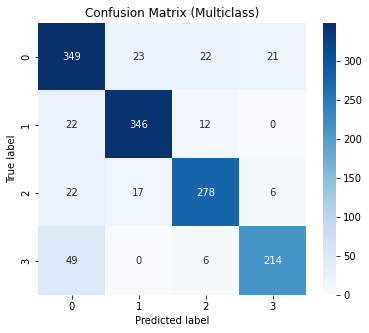

            sens   spec    ppv    npv  accuracy
0          0.841  0.904  0.790  0.930     0.885
1          0.911  0.960  0.896  0.966     0.947
2          0.861  0.962  0.874  0.958     0.939
3          0.796  0.976  0.888  0.952     0.941
macro-avg  0.852  0.951  0.862  0.952     0.856
Accuracy: 0.855803893294881


In [33]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score

def class_wise_report(y_true, y_pred, class_names=None, digits=3):
    """
    Return a DataFrame with sensitivity, specificity, ppv, npv, accuracy
    for every class in a multiclass problem plus a final 'macro-average' row.
    """
    labels = np.unique(y_true)
    if class_names is None:
        class_names = [f"class_{i}" for i in labels]

    mcm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)

    metrics = []
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mcm[i].ravel()
        sens = tp / (tp + fn + 1e-9)
        spec = tn / (tn + fp + 1e-9)
        ppv  = tp / (tp + fp + 1e-9)
        npv  = tn / (tn + fn + 1e-9)
        acc  = (tp + tn) / (tp + tn + fp + fn)
        metrics.append([sens, spec, ppv, npv, acc])

    # macro-average
    macro = np.array(metrics).mean(axis=0)
    metrics.append(macro)

    # overall (micro) accuracy
    overall_acc = accuracy_score(y_true, y_pred)

    # build DataFrame
    class_names = list(class_names)
    class_names.append("macro-avg")
    df = pd.DataFrame(metrics,
                      columns=["sens", "spec", "ppv", "npv", "accuracy"],
                      index=class_names)
    df.loc["macro-avg", "accuracy"] = overall_acc   # overwrite with micro accuracy
    return df.round(digits)


fig = plt.figure()

# 1️⃣ Compute confusion matrix

# Convert to predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_, y_pred_labels)
labels = np.unique(y_)

# 2️⃣ Using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (Multiclass)')
plt.show()

# Accuracy
accuracy = np.trace(cm) / np.sum(cm)
#print("\nClassification Report:\n", classification_report(y_, y_pred_labels))
print(class_wise_report(y_, y_pred_labels,
                            class_names=labels))

print("Accuracy:", accuracy)

0
1
2
3


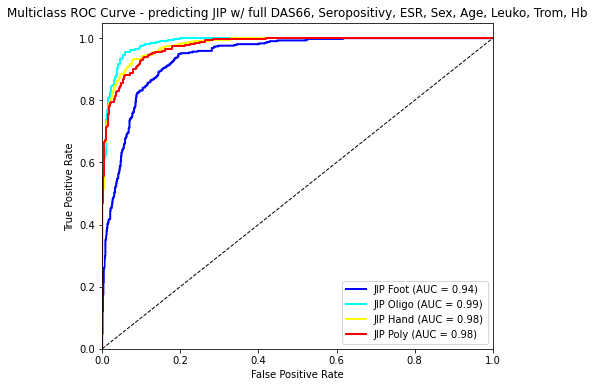

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes =4

y_pred_labels = np.array(y_pred)
for i in range(n_classes):
    print(i)
    fpr[i], tpr[i], _ = roc_curve(y_ == i, y_pred_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
#fpr["micro"], tpr["micro"], _ = roc_curve(y_.ravel(), y_pred_labels.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot
plt.figure(figsize=(7,6))
colors = ['blue', 'cyan', 'yellow', 'red']
l_labels = ['Foot', 'Oligo', 'Hand', 'Poly']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'JIP {l_labels[i]} (AUC = {roc_auc[i]:0.2f})')

#plt.plot(fpr["micro"], tpr["micro"], color='black', linestyle='--',
#         label=f'Micro-average (AUC = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - predicting JIP w/ full DAS66, Seropositivy, ESR, Sex, Age, Leuko, Trom, Hb')
plt.legend(loc="lower right")
plt.show()

### 3.5 Use thresholds

Keeping 1127 of 1387 samples (81.3%)
[0.87, 0.45, 0.45, 0.85]
Confusion matrix for confident predictions (threshold:[0.87, 0.45, 0.45, 0.85])


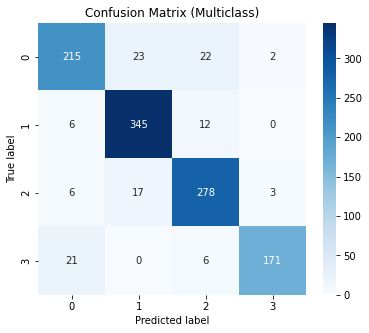

Accuracy: 0.8952972493345164
            sens   spec    ppv    npv  accuracy
0          0.821  0.962  0.867  0.947     0.929
1          0.950  0.948  0.896  0.976     0.949
2          0.914  0.951  0.874  0.968     0.941
3          0.864  0.995  0.972  0.972     0.972
macro-avg  0.887  0.964  0.902  0.965     0.895


In [40]:
#y_confidence = np.max(y_pred, axis=1)

# 2️⃣ Define confidence threshold
threshold = 0.72

# PPV above 80
thresholds= [0.72, 0.45, 0.45, 0.72]

# PPV above 85
def predict_with_cutoffs_and_reject(y_proba, thresholds):
    above = y_proba >= thresholds
    preds = np.argmax(y_proba, axis=1)   # default prediction

    final = []
    for i in range(len(y_proba)):
        if not np.any(above[i]):
            final.append(-1)  # or 'no_prediction'
        else:
            # pick among those above threshold
            valid_classes = np.where(above[i])[0]
            best = valid_classes[np.argmax(y_proba[i][valid_classes])]
            final.append(best)

    return np.array(final)

y_pred_thresh = predict_with_cutoffs_and_reject(np.array(y_pred), thresholds)
mask_confident = y_pred_thresh != -1

# 3️⃣ Filter only confident predictions
#mask_confident = y_confidence >= threshold

y_true_conf = y_[mask_confident]
y_pred_conf = y_pred_labels[mask_confident]

print(f"Keeping {mask_confident.sum()} of {len(y_)} samples ({mask_confident.mean()*100:.1f}%)")

# 4️⃣ Compute confusion matrix
cm = confusion_matrix(y_true_conf, y_pred_conf)
print(thresholds)
print("Confusion matrix for confident predictions (threshold:" + str(thresholds) + ')')
#print(cm)

labels = np.unique(y_pred_conf)

# 2️⃣ Using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (Multiclass)')
plt.show()

# Accuracy
accuracy = np.trace(cm) / np.sum(cm)
print("Accuracy:", accuracy)
print(class_wise_report(y_true_conf, y_pred_conf,
                            class_names=labels))

### 3.6 show probability per cluster

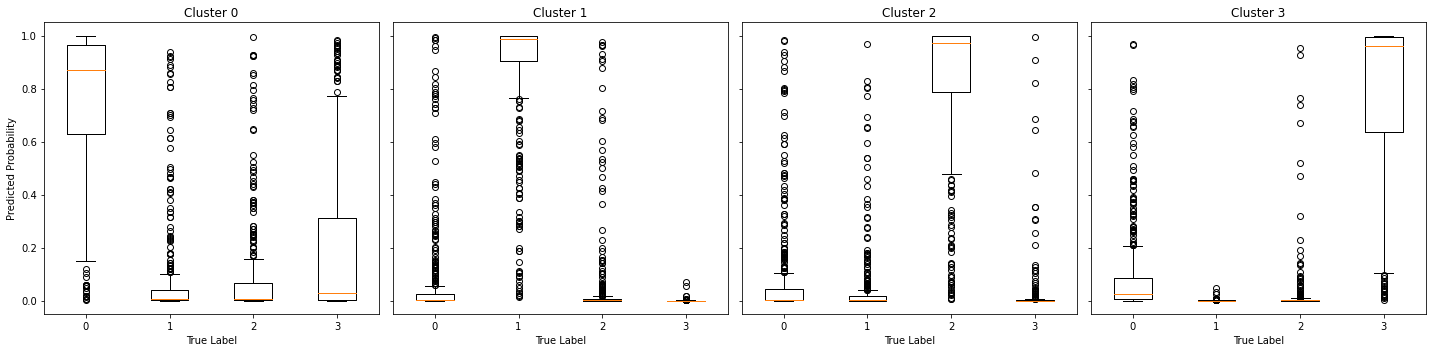

In [22]:

n_clusters = np.array(y_pred).shape[1]

fig, axes = plt.subplots(1, n_clusters, figsize=(5 * n_clusters, 5), sharey=True)

for k in range(n_clusters):
    df = pd.DataFrame({
        "prob": np.array(y_pred)[:, k],
        "true_label": y_
    })

    axes[k].boxplot(
        [df[df["true_label"] == c]["prob"] for c in sorted(df["true_label"].unique())],
        labels=sorted(df["true_label"].unique())
    )
    axes[k].set_title(f"Cluster {k}")
    axes[k].set_xlabel("True Label")
    if k == 0:
        axes[k].set_ylabel("Predicted Probability")

plt.tight_layout()
plt.show()

## 4. Feature importance

### 4.1 Show SHAP

In [23]:
import shap
import time

t0 = time.time()
# Train XGBoost model with booster='dart' (regular TreeExplainer does not work for dart)

# Wrapper function to safely handle DMatrix conversion -> For booster 'dart'
def safe_predict(data):
    return bst.predict(xgb.DMatrix(data))

# Use shap.Explainer with the wrapper
t_explainer = shap.Explainer(safe_predict, X_test)

#t_explainer = shap.Explainer(final_model.predict, x_test[l_elastic])
shap_values = t_explainer(X_test)
                                   

t1 = time.time()
print('Calculating SHAP: ' + str(t1-t0))



Permutation explainer: 463it [32:14,  4.19s/it]                         

Calculating SHAP: 1934.6567721366882


In [24]:
import matplotlib.pyplot as plt

N_FEAT = 20 

# Create SHAP per cluster
for i in range(4):
    plt.figure(figsize=(10, 6))  
    shap.plots.beeswarm(shap_values[:,:, i], max_display=N_FEAT, show=False)

    plt.savefig('../figures/das66/shap_top%s_cluster_%s.png' % (str(N_FEAT), str(i)), dpi=100, bbox_inches='tight')
    # Save the figure
    plt.close()  # Close the figure to prevent displaying again
    plt.clf()

<Figure size 432x288 with 0 Axes>